In [10]:
from __future__ import division, print_function, unicode_literals

import tensorflow as tf
from os import path, getcwd, chdir
import matplotlib.pyplot as plt

path = f"{getcwd()}/../tmp2/mnist.npz"

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2010 - mae: 4.3737 - mse: 27.3830
Epoch 2/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0812 - mae: 4.3737 - mse: 27.3898
Epoch 3/15
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0525 - mae: 4.3737 - mse: 27.3914
Epoch 4/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0362 - mae: 4.3737 - mse: 27.3922
Epoch 5/15
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0282 - mae: 4.3737 - mse: 27.3928
Epoch 6/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0204 - mae: 4.3737 - mse: 27.3932
Epoch 7/15
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0175 - mae: 4.3737 - mse: 27.3934
Epoch 8/15
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0142 - mae: 4.3737 - mse: 27.3936
Epoch 9/15
60000/60000 [================

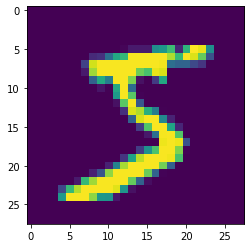

In [23]:
def train_mnist():
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train/255.0, x_test/255.0
    plt.imshow(x_train[0])
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['mae', 'mse'])
    history = model.fit(x_train, y_train, epochs=15)
    return history#.epoch, history.history['accuracy'][-1]
history = train_mnist()

ValueError: not enough values to unpack (expected 2, got 1)

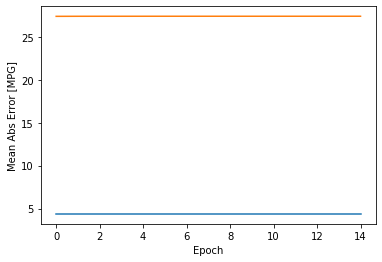

In [25]:
import pandas as pd
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['mse'], label='Val Error')
    plt.ylim(['0, 20'])
    plt.legend()
    plt.show()
    
plot_history(history)